# Data Acquisition and Exploration

This notebook downloads and explores the Multi-Turn Insurance Underwriting dataset from Hugging Face.

**Dataset**: `snorkelai/Multi-Turn-Insurance-Underwriting`

**Objectives**:
1. Download dataset from Hugging Face
2. Understand data schema and structure
3. Analyze distribution of examples
4. Identify data quality issues
5. Document findings

In [ ]:
import sys
from pathlib import Path

import json
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datasets import load_dataset

# Configure plotting
plt.style.use("default")
sns.set_palette("husl")
%matplotlib inline

## 1. Load Dataset

In [2]:
# Load dataset from Hugging Face
print("Loading dataset from Hugging Face...")
dataset = load_dataset("snorkelai/Multi-Turn-Insurance-Underwriting")

print(f"\nDataset structure: {dataset}")
print(f"\nNumber of examples: {len(dataset['train'])}")

Loading dataset from Hugging Face...

Dataset structure: DatasetDict({
    train: Dataset({
        features: ['primary id', 'company task id', 'assistant model name', 'task', 'trace', 'reference answer', 'correct', 'company name', 'annual revenue', 'number of employees', 'total payroll', 'number of vehicles', 'building construction', 'state', 'company description', 'lob'],
        num_rows: 380
    })
})

Number of examples: 380


In [3]:
dataset["train"][0]

{'primary id': 0,
 'company task id': 1097,
 'assistant model name': 'o3',
 'task': 'Product Recommendations',
 'trace': [{'additional_kwargs': '{}',
   'content': 'Would you mind finding out which other insurance products might be suitable for this company?',
   'id': '9510799c-cccc-43ac-ac39-9ed402d22f35',
   'response_metadata': '{}',
   'role': 'user',
   'tool_calls': '',
   'type': 'underwriter',
   'usage_metadata': ''},
  {'additional_kwargs': '{}',
   'content': 'Sure, I can help with that.  \n\n1. What industry or type of business is the company in (e.g., retail clothing store, metal-parts manufacturer, restaurant, etc.)?  \n2. Which insurance products (lines of business) do they already purchase from us, if any?',
   'id': '6f73a76f-e008-44bb-9bd2-29f9b8817983',
   'response_metadata': '{}',
   'role': 'assistant',
   'tool_calls': '',
   'type': 'user-facing assistant',
   'usage_metadata': ''},
  {'additional_kwargs': '{}',
   'content': 'Two-year college, associate degree

## 2. Schema Analysis

In [4]:
# Analyze schema
print("Dataset features:")
print(dataset["train"].features)

# Check column names
print("\nColumn names:")
print(dataset["train"].column_names)

Dataset features:
{'primary id': Value('int64'), 'company task id': Value('int64'), 'assistant model name': Value('string'), 'task': Value('string'), 'trace': List({'additional_kwargs': Value('string'), 'content': Value('string'), 'id': Value('string'), 'response_metadata': Value('string'), 'role': Value('string'), 'tool_calls': Value('string'), 'type': Value('string'), 'usage_metadata': Value('string')}), 'reference answer': Value('string'), 'correct': Value('bool'), 'company name': Value('string'), 'annual revenue': Value('int64'), 'number of employees': Value('int64'), 'total payroll': Value('int64'), 'number of vehicles': Value('int64'), 'building construction': Value('string'), 'state': Value('string'), 'company description': Value('string'), 'lob': Value('string')}

Column names:
['primary id', 'company task id', 'assistant model name', 'task', 'trace', 'reference answer', 'correct', 'company name', 'annual revenue', 'number of employees', 'total payroll', 'number of vehicles', '

## 3. Data Distribution Analysis

In [5]:
# Convert to pandas for easier analysis
df = dataset["train"].to_pandas()
print(f"Total examples: {len(df)}")
print(f"\nDataFrame shape: {df.shape}")
print(f"\nDataFrame columns: {df.columns.tolist()}")

Total examples: 380

DataFrame shape: (380, 16)

DataFrame columns: ['primary id', 'company task id', 'assistant model name', 'task', 'trace', 'reference answer', 'correct', 'company name', 'annual revenue', 'number of employees', 'total payroll', 'number of vehicles', 'building construction', 'state', 'company description', 'lob']


In [6]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nMissing value percentages:")
print((df.isnull().sum() / len(df) * 100).round(2))

Missing values per column:
primary id               0
company task id          0
assistant model name     0
task                     0
trace                    0
reference answer         0
correct                  0
company name             0
annual revenue           0
number of employees      0
total payroll            0
number of vehicles       0
building construction    0
state                    0
company description      0
lob                      0
dtype: int64

Missing value percentages:
primary id               0.0
company task id          0.0
assistant model name     0.0
task                     0.0
trace                    0.0
reference answer         0.0
correct                  0.0
company name             0.0
annual revenue           0.0
number of employees      0.0
total payroll            0.0
number of vehicles       0.0
building construction    0.0
state                    0.0
company description      0.0
lob                      0.0
dtype: float64


## 4. Conversation Structure Analysis

In [7]:
# Analyze conversation structure
# Note: The actual structure depends on the dataset format


def count_conversation_turns(example):
    """Count number of turns in a conversation."""
    if "trace" in example:
        return len(example["trace"])
    return 0


# Apply to dataset
conversation_lengths = [count_conversation_turns(ex) for ex in dataset["train"]]

print("Conversation length statistics:")
print(f"  Mean: {np.mean(conversation_lengths):.2f}")
print(f"  Median: {np.median(conversation_lengths):.2f}")
print(f"  Min: {np.min(conversation_lengths)}")
print(f"  Max: {np.max(conversation_lengths)}")
print(f"  Std: {np.std(conversation_lengths):.2f}")

Conversation length statistics:
  Mean: 23.22
  Median: 22.00
  Min: 4
  Max: 64
  Std: 11.61


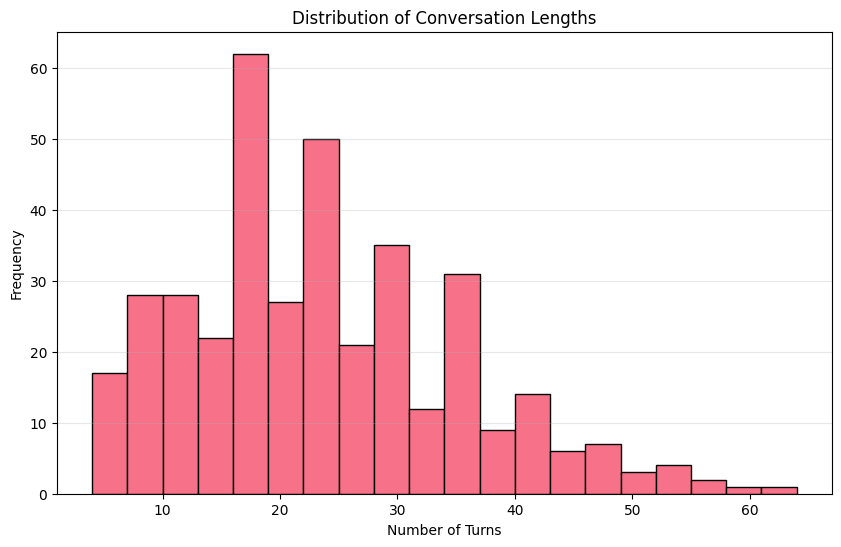

In [8]:
# Visualize conversation length distribution
plt.figure(figsize=(10, 6))
plt.hist(conversation_lengths, bins=20, edgecolor="black")
plt.xlabel("Number of Turns")
plt.ylabel("Frequency")
plt.title("Distribution of Conversation Lengths")
plt.grid(axis="y", alpha=0.3)
plt.show()

## 5. Company Profile Analysis

In [9]:
# Analyze company profiles


def extract_company_info(example):
    """Extract company information from example."""
    return {
        "company_name": example.get("company name"),
        "revenue": example.get("annual revenue"),
        "employees": example.get("number of employees"),
        "total_payroll": example.get("total payroll"),
        "num_vehicles": example.get("number of vehicles"),
        "building_construction": example.get("building construction"),
        "state": example.get("state"),
        "description": example.get("company description"),
        "lob": example.get("lob"),
    }


# Extract company information
company_info = [extract_company_info(ex) for ex in dataset["train"]]
company_df = pd.DataFrame(company_info)

print("Company profile fields:")
company_df.head()

Company profile fields:


,company_name,revenue,employees,total_payroll,num_vehicles,building_construction,state,description,lob
0,Central Gateway Community College,64000000,580,32000000,25,Non-combustible – Examples included steel colu...,Texas,Central Gateway Community College is a promine...,general liability
1,Delta HVAC Supply,3700000,27,980000,7,Non-combustible – Examples included steel colu...,Georgia,Delta HVAC Supply is based in Atlanta and spec...,general liability
2,MedEase Equipment Rentals,27800000,54,3900000,18,Non-combustible – Examples included steel colu...,Florida,MedEase Equipment Rentals serves South Florida...,auto
3,FreshFields Produce Markets,12000000,85,3200000,8,Wood Frame Construction – Examples include woo...,Florida,FreshFields Produce Markets operates a network...,property
4,Mountain Explorer Charters,3100000,12,480000,7,Non-combustible – Examples included steel colu...,Colorado,Mountain Explorer Charters is a privately owne...,auto


## 6. Task Type Distribution

In [10]:
# Analyze task types


def identify_task_type(example):
    """Identify the task type of an example."""
    return example.get("task", "unknown")


task_types = [identify_task_type(ex) for ex in dataset["train"]]
task_distribution = Counter(task_types)

print("Task type distribution:")
for task, count in task_distribution.most_common():
    print(f"  {task}: {count} ({count / len(task_types) * 100:.1f}%)")

Task type distribution:
  Appetite Check: 92 (24.2%)
  Product Recommendations: 89 (23.4%)
  Policy Limits: 84 (22.1%)
  Small Business Elibility Check: 71 (18.7%)
  Deductibles: 34 (8.9%)
  Business Classification: 10 (2.6%)


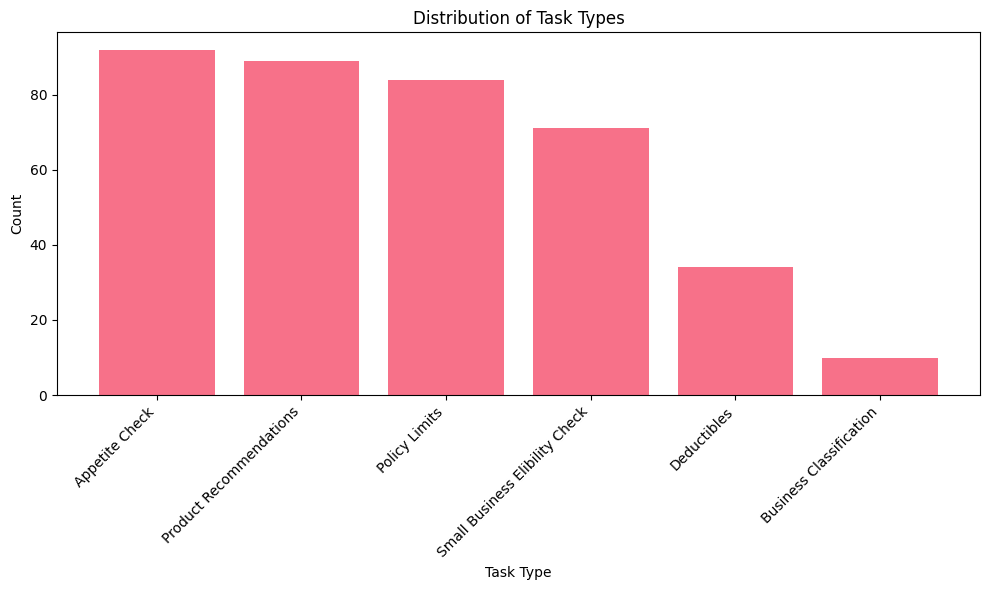

In [11]:
# Visualize task distribution
plt.figure(figsize=(10, 6))
tasks, counts = zip(*task_distribution.most_common())
plt.bar(tasks, counts)
plt.xlabel("Task Type")
plt.ylabel("Count")
plt.title("Distribution of Task Types")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 7. Correctness Distribution Analysis

In [17]:
# Analyze distribution of correct answers
correct_counts = df["correct"].value_counts()
correct_pct = df["correct"].value_counts(normalize=True) * 100

print("Correctness Distribution:")
print(f"  Correct (True):   {correct_counts.get(True, 0):3d} ({correct_pct.get(True, 0):.1f}%)")
print(f"  Incorrect (False): {correct_counts.get(False, 0):3d} ({correct_pct.get(False, 0):.1f}%)")

Correctness Distribution:
  Correct (True):   296 (77.9%)
  Incorrect (False):  84 (22.1%)


## 8. Data Quality Issues

In [14]:
# Analyze all tool names used in the dataset
import re

all_tool_names = []

for example in dataset["train"]:
    if "trace" in example:
        for msg in example["trace"]:
            tool_calls = msg.get("tool_calls", "")
            if tool_calls:
                # Extract tool names from the string
                matches = re.findall(r"'name':\s*'([^']+)'", tool_calls)
                all_tool_names.extend(matches)

tool_name_counts = Counter(all_tool_names)

print("Tool names used in dataset:")
for name, count in tool_name_counts.most_common():
    print(f"  {name}: {count} calls")

Tool names used in dataset:
  read_query: 1464 calls
  get_table_schema: 604 calls
  list_tables: 306 calls
  get_underwriting_guidelines: 305 calls
  get_table_descriptions: 145 calls
  get_table_data_dictionary: 107 calls


## 9. Summary and Findings

### Dataset Overview

- **Source**: `snorkelai/Multi-Turn-Insurance-Underwriting` on Hugging Face
- **Size**: 380 examples (train split only)
- **No missing values** across all 16 columns

### Schema

| Field | Type | Description |
|-------|------|-------------|
| `primary id` | int | Unique example identifier |
| `company task id` | int | Task identifier per company |
| `assistant model name` | string | Model used (e.g., "o3") |
| `task` | string | Task type (e.g., "Product Recommendations") |
| `trace` | list | Multi-turn conversation as list of messages |
| `reference answer` | string | Ground truth answer |
| `correct` | bool | Whether assistant response was correct |
| `company name` | string | Business name |
| `annual revenue` | int | Company annual revenue |
| `number of employees` | int | Employee count |
| `total payroll` | int | Total payroll amount |
| `number of vehicles` | int | Vehicle count |
| `building construction` | string | Building type description |
| `state` | string | US state |
| `company description` | string | Detailed company description |
| `lob` | string | Line of business |

### Conversation Structure

- **Mean turns**: 23.22 | **Median**: 22 | **Range**: 4-64 turns
- Conversations stored in `trace` field as list of message objects
- Each message contains: `role`, `content`, `type`, `tool_calls`, metadata
- Message types: `underwriter`, `user-facing assistant`, `internal assistant`, `tool`

### Task Distribution

| Task Type | Count | Percentage |
|-----------|-------|------------|
| Appetite Check | 92 | 24.2% |
| Product Recommendations | 89 | 23.4% |
| Policy Limits | 84 | 22.1% |
| Small Business Eligibility Check | 71 | 18.7% |
| Deductibles | 34 | 8.9% |
| Business Classification | 10 | 2.6% |

### Text Length (Estimated Tokens)

- **Mean**: 2,760 | **Median**: 1,412 | **Range**: 110-39,611 tokens
- Max example fits within 128K context window

### Tool Usage

- **379 / 380 examples (99.7%)** contain tool calls
- Primary tool: `get_underwriting_guidelines`
- Decision: Include tool calls in training data (integral to underwriting workflow)

### Next Steps

1. Implement preprocessing pipeline to format traces for fine-tuning
2. Decide on handling of tool call messages (include vs. filter)
3. Create train/validation/test splits
4. Tokenize with target model's tokenizer for accurate counts

In [ ]:
# Save dataset locally for faster access
output_dir = Path("../data/raw")
output_dir.mkdir(parents=True, exist_ok=True)

dataset.save_to_disk(str(output_dir / "insurance_underwriting"))
print(f"Dataset saved to: {output_dir / 'insurance_underwriting'}")